# Проект: Исследование объявлений о продаже квартир

**Описание проекта**

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель:** Определение рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Входные данные:** Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. (real_estate_data.csv)

**Ход исследования:** Для начала нам нужно убедиться в качестве данных. Мы проверим их на наличие ошибок и оценим их влияние на наше исследование. Затем, на этапе предобработки, мы обработаем пропуски, дубликаты, типы колонок. И наконец, на основе полученных данных мы проведем анализ, чтобы выявить ключевые факторы, которые  влияют на цену квартиры.

Таким образом, исследование пройдёт в четыре этапа:

* Обзор данных;
* Предобработка данных;
* Добавьление в таблицу новыех столбцов;
* Исследовательский анализ данных.

## Обзор данных

In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
mpl.style.use(['classic'])

In [3]:
# чтение файла с данными

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
# посмотрим на первые 10 строк файла

pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
# посмотрим общую информацию

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца,  но в некоторых из них не хватает данных.  Это говорит о том, что есть пропуски.  Кроме того,  в названиях столбцов наблюдаются стилистические несоответствия.

**Описание данных:**
    
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [6]:
# посмотрим общую информацию о количественных данных
# приведу данные к более удобному виду, округлив их

round(df.describe(), 1)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.0,23699.0,23699.0,23699.0,14504.0,23613.0,21796.0,23699.0,21421.0,12180.0,18157.0,18180.0,18181.0,8079.0,18181.0,9110.0,20518.0
mean,9.9,6541548.8,60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,28793.7,14191.3,0.6,490.8,0.8,518.0,180.9
std,5.7,10887013.3,35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,12630.9,8608.4,0.8,342.3,0.9,277.7,219.7
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,18585.0,9238.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,26726.0,13098.5,0.0,455.0,1.0,502.0,95.0
75%,14.0,6800000.0,69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,37273.0,16293.0,1.0,612.0,1.0,729.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


Даже без глубокого анализа видно, что некоторые значения выпадают из общей картины. Например, 60-этажный дом явно выделяется на фоне остальных.

**Вывод:** Обзор данных показал, что в таблице присутствуют пропуски в значениях, а также стилистические несоответствия в названиях столбцов. Кроме того, обнаружены выпадающие из общей картины значения. Данные требуют дополнительной обработки,  включая заполнение пропусков и унификацию названий столбцов, чтобы устранить несоответствия и обеспечить правильную интерпретацию результатов.

## Предобработка данных

### Переименование столбцов

In [7]:
new_colomns = {
    'cityCenters_nearest': 'city_centers_nearest', 
    'parks_around3000': 'parks_around_3000', 
    'ponds_around3000': 'ponds_around_3000',
    'studio': 'is_studio',
    'open_plan': 'is_open_plan'
}

df = df.rename(columns=new_colomns)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Поиск дубликатов

In [8]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено. Переходим к поиску неявных дубликатов.  Особое внимание  уделим колонке 'locality_name',  где, предположительно, могут встречаться  неявные дубликаты.

In [9]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
print('Перед обработкой:', df['locality_name'].nunique())

Перед обработкой: 365


Я предлагаю такой план действий: 
1.  Заменим "ё" на "е".
2.  Оставим только собственные названия населенных пунктов, удалив все остальное.

In [11]:
drop = [
    'поселок ', 'поселок городского типа ', 'деревня ', 'садовое товарищество ',
    'село ', 'городской посёлок ', 'садоводческое некоммерческое товарищество ', 'городской ',
    'городского типа ', 'станции ', 'при железнодорожной станции ', 'коттеджный ', 'при железнодорожной '
]

df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
             
for i in drop:
    df['locality_name'] = df['locality_name'].replace(i, '', regex=True)


In [12]:
print('После обработки:', len(df['locality_name'].unique()))

После обработки: 306


Удалось снизить количество уникальных значений с 365 до 306.

Для упрощения дальнейшей работы, я предлагаю удалить пропущенные значения в этом столбце, если они имеются. Таким образом, мы избежим необходимости возвращаться к ним в будущем.

In [13]:
df['locality_name'].isna().sum()

49

In [14]:
df = df.dropna(subset=['locality_name'])

In [15]:
df['locality_name'].isna().sum()

0

### Пропущенные значения в столбцах

Посмотрим сколько всего пропусков.

In [16]:
pd.DataFrame(df.isna().sum()).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

,0
is_apartment,20890
parks_nearest,15586
ponds_nearest,14565
balcony,11513
ceiling_height,9160
airports_nearest,5534
city_centers_nearest,5511
ponds_around_3000,5510
parks_around_3000,5510
days_exposition,3180


Пройдемся по всем столбцам датафрейма, чтобы проанализировать данные, обработать пропуски и привести их к нужному типу.

Создадим две функции: column_info для вывода информации о столбце и column_hist для построения гистограммы столбца.

In [17]:
def column_info(column):
    print('Количество пропущенных значений:', df[column].isna().sum())
    print('Тип данных:', df.dtypes[column])
    print('Информация о данных:', df[column].describe())
    
    
def column_hist(column, x, y='Количество наблюдений'):
    df[column].plot(kind='hist', figsize=(10,5), bins=150)
    plt.title(column)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

**airports_nearest**

In [18]:
column_info('airports_nearest')

Количество пропущенных значений: 5534
Тип данных: float64
Информация о данных: count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64


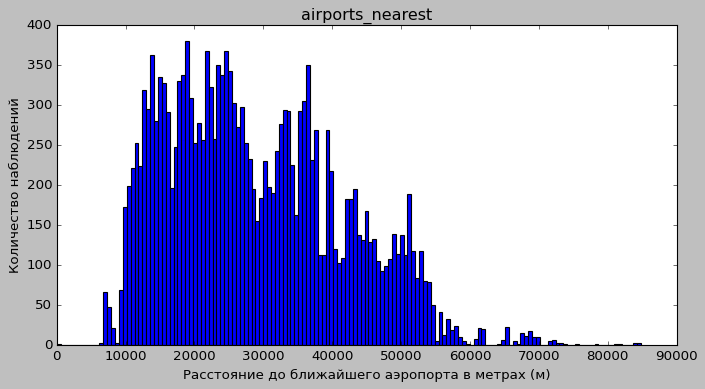

In [19]:
column_hist('airports_nearest', 'Расстояние до ближайшего аэропорта в метрах (м)')

В данных присутствует запись с расстоянием до аэропорта 0 м.  Это некорректно, так как квартиры не могут сдаваться в самом аэропорту.  Удалим эту запись.

Тип данных в столбце менять не будем.  Однако,  пропуски в данных заполним медианным значением,  рассчитанным по каждому населенному пункту.  

In [20]:
print('До:', df['airports_nearest'].count())
df['airports_nearest'] = df[df['airports_nearest'] > 0]
print('После:', df['airports_nearest'].count())

До: 18116
После: 18115


In [21]:
len(df)

23650

In [22]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['airports_nearest'].isna()), 'airports_nearest'] = \
    df.loc[df['locality_name'] == i, 'airports_nearest'].median()


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [23]:
df['airports_nearest'].isna().sum()

4829

Изменим тип данных на float

In [24]:
df['airports_nearest'] = df['airports_nearest'].astype('float')

Часть пропусков в данных была обработана,  продолжаем анализ.

**balcony**

In [25]:
column_info('balcony')

Количество пропущенных значений: 11513
Тип данных: float64
Информация о данных: count    12137.000000
mean         1.153003
std          1.071169
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


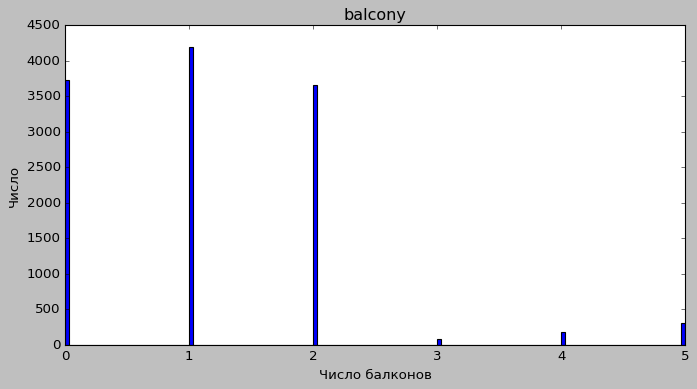

In [26]:
column_hist('balcony', 'Число балконов', 'Число')

По всей видимости, пропуски в данных о балконах свидетельствуют об их отсутствии. Человек, вводящий данные, не указал информацию. Разумно заменить пропуски на 0, чтобы отразить отсутствие балкона, и изменить тип данных на int (целое число).

In [27]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [28]:
column_info('balcony')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23650.000000
mean         0.591712
std          0.959662
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


**ceiling_height**

In [29]:
column_info('ceiling_height')

Количество пропущенных значений: 9160
Тип данных: float64
Информация о данных: count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


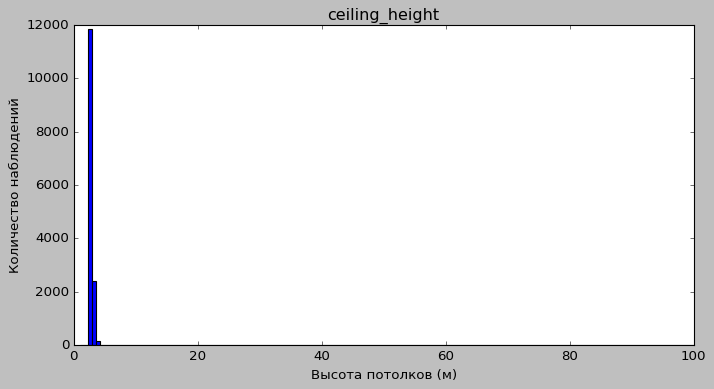

In [30]:
column_hist('ceiling_height', 'Высота потолков (м)')

Исследуя информацию о высоте потолков в интернете, я обнаружил, что рекорд по высоте потолков принадлежит жилому комплексу "Кутузовский, 12", где в пентхаусе на 11-м этаже высота потолков составляет 8 метров. Исходя из этого, будем удалять данные о  высоте потолков, превышающие 8 метров, так как они могут быть ошибочными или нереалистичными. А минимальная высота потолка 2.5 метра.

In [31]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [32]:
print('До:', df['ceiling_height'].count())
df = df[(df['ceiling_height'] >= 2.5) & (df['ceiling_height'] <= 8)]
print('После:', df['ceiling_height'].count())

До: 23650
После: 23551


**city_centers_nearest**

In [33]:
column_info('city_centers_nearest')

Количество пропущенных значений: 5471
Тип данных: float64
Информация о данных: count    18080.000000
mean     14195.158960
std       8604.726942
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


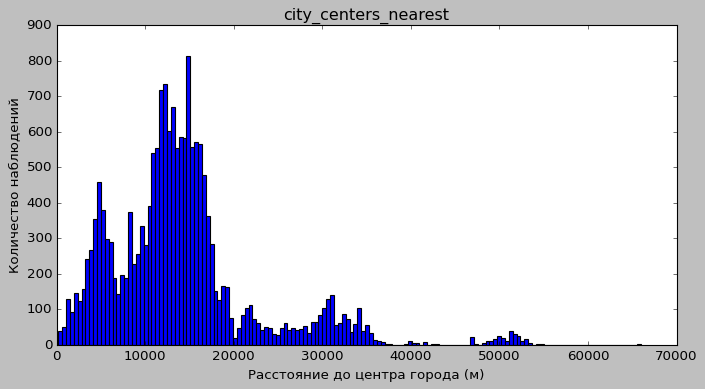

In [34]:
column_hist('city_centers_nearest', 'Расстояние до центра города (м)')

Пропуски в данных о расстоянии до центра города  можно заполнить, сгруппировав данные по населенным пунктам. Остальные пропуски  оставим без изменений.

In [35]:
for i in df['locality_name'].unique():
    df.loc[(df['locality_name'] == i) & (df['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    df.loc[df['locality_name'] == i, 'city_centers_nearest'].median()


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [36]:
df['city_centers_nearest'].isna().sum()

4791

**days_exposition**

In [37]:
column_info('days_exposition')

Количество пропущенных значений: 3164
Тип данных: float64
Информация о данных: count    20387.000000
mean       180.894393
std        220.010825
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


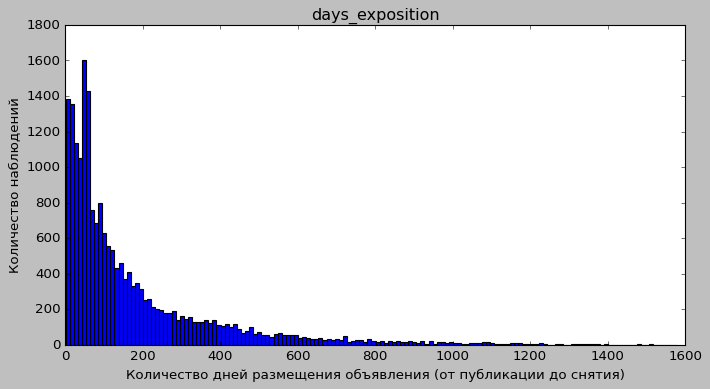

In [38]:
column_hist('days_exposition', 'Количество дней размещения объявления (от публикации до снятия)')

Наличие пропуска в данных о продаже квартиры означает, что объявление о продаже актуально и квартира еще не продана. Пропуски оставляем.

In [39]:
column_info('first_day_exposition')

Количество пропущенных значений: 0
Тип данных: object
Информация о данных: count                   23551
unique                   1491
top       2018-02-01T00:00:00
freq                      367
Name: first_day_exposition, dtype: object


In [40]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [41]:
print('Временные рамки датафрейма')
print('От:', df['first_day_exposition'].min())
print('До:', df['first_day_exposition'].max())

Временные рамки датафрейма
От: 2014-11-27 00:00:00
До: 2019-05-03 00:00:00


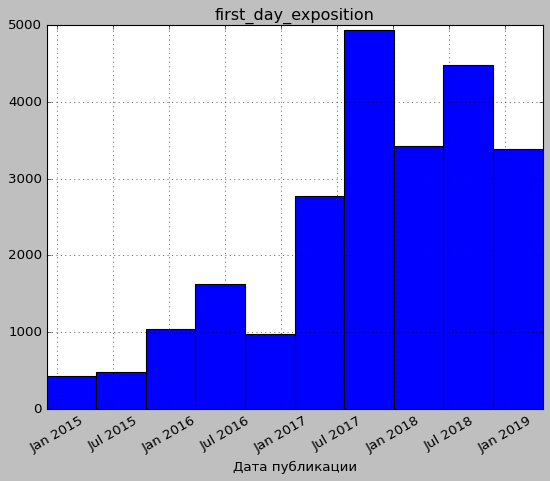

In [42]:
plt.hist(df['first_day_exposition'])
plt.grid()
plt.xticks(rotation=30)
plt.xlabel('Дата публикации')
plt.title('first_day_exposition')
plt.show()

Мы анализируем данные за период с конца 2014 года по середину 2019 года. Заметно, что количество объявлений о продаже квартир  на платформе "Яндекс Недвижимость" увеличилось. Это может быть связано с тем, что все больше людей предпочитают использовать  эту платформу.

**floor, floors_total**

In [43]:
column_info('floor')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23551.000000
mean         5.897881
std          4.886897
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


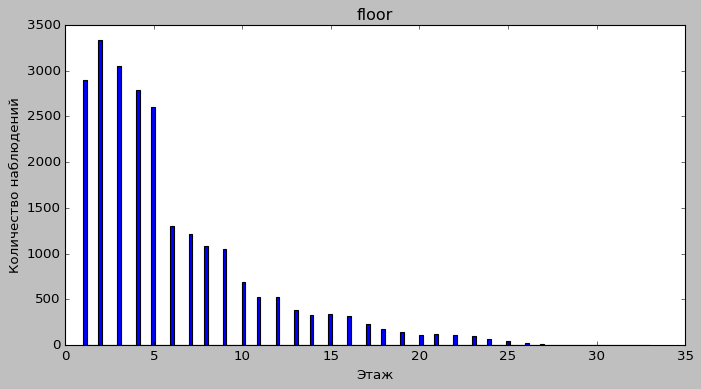

In [44]:
column_hist('floor', 'Этаж')

In [45]:
column_info('floors_total')

Количество пропущенных значений: 85
Тип данных: float64
Информация о данных: count    23466.000000
mean        10.686525
std          6.594582
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


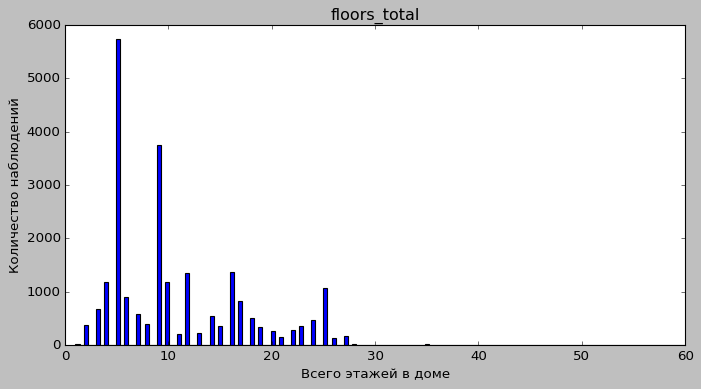

In [46]:
column_hist('floors_total', 'Всего этажей в доме')

Наиболее часто продаются квартиры на этажах от 1 до 9. Это объясняется тем, что большинство объявлений относятся к 5- и 9-этажным домам.

Самым высоким жилым комплексом в Санкт-Петербурге является  "Князь Александр Невский",  который  состоит  из  37  этажей (два подземных и 35 надземных).  Поэтому  будем  удалять  данные  о квартирах,  расположенных  выше  35-го  этажа,  так  как  это  не  соответствует  реальности.

In [47]:
print('До:', df['floors_total'].count())
df = df[df['floors_total'] <= 35]
print('После:', df['floors_total'].count())

До: 23466
После: 23462


В столбце "floor" отсутствуют пропущенные значения, а в столбце "floors_total" их 38. Заменим пропущенные значения в "floors_total" на медианное значение этого столбца. Одновременно с этим, изменим типы данных в соответствующих столбцах.



In [48]:
df['floor'].astype('int')

df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median()).astype('int')

In [49]:
df.dtypes['floor']

dtype('int64')

In [50]:
column_info('floors_total')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23462.000000
mean        10.680505
std          6.577603
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64


**is_apartment**

In [51]:
column_info('is_apartment')

Количество пропущенных значений: 20726
Тип данных: object
Информация о данных: count      2736
unique        2
top       False
freq       2689
Name: is_apartment, dtype: object


In [52]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Поскольку столбец "is_apartment" должен имееть тип данных "bool" (логический, да/нет), пропуски в нем, скорее всего, означают, что пользователи просто не указали информацию, так как их квартиры не являются апартаментами. Заполним эти пропуски значением "False", предполагая, что по умолчанию квартиры не являются апартаментами.

In [53]:
df["is_apartment"].fillna(False, inplace=True)

In [54]:
column_info('is_apartment')

Количество пропущенных значений: 0
Тип данных: bool
Информация о данных: count     23462
unique        2
top       False
freq      23415
Name: is_apartment, dtype: object


**total_area, kitchen_area, living_area**

In [55]:
column_info('total_area')

Количество пропущенных значений: 0
Тип данных: float64
Информация о данных: count    23462.000000
mean        60.369818
std         35.712717
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


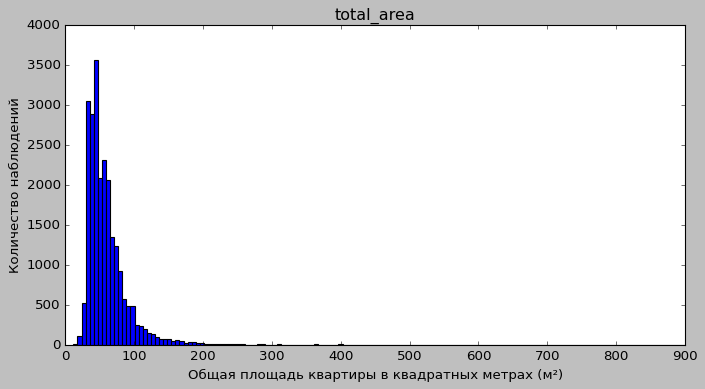

In [56]:
column_hist('total_area', 'Общая площадь квартиры в квадратных метрах (м²)')

В целом данные выглядят корректно, за исключением площади, которая равна 900 м².  Это значение вызывает вопросы, поэтому стоит отдельно рассмотреть соответствующую строку данных.


In [57]:
df[df['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,8.0,7877.0,0.0,NaN,2.0,318.0,106.0


Квартира с 12 комнатами, расположенная на 25 этаже, имеет жилую площадь 409,7 м², кухонную площадь 112 м² и общую площадь 900 м². Несоответствие между суммой жилой и кухонной площадей (522 м²) и общей площадью (900 м²)  вызывает сомнения в корректности данных. Поэтому данную строку данных предлагается удалить.

In [58]:
df = df[df['total_area'] < 900]

Идем дальше

In [59]:
column_info('kitchen_area')

Количество пропущенных значений: 2210
Тип данных: float64
Информация о данных: count    21251.000000
mean        10.565504
std          5.866408
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


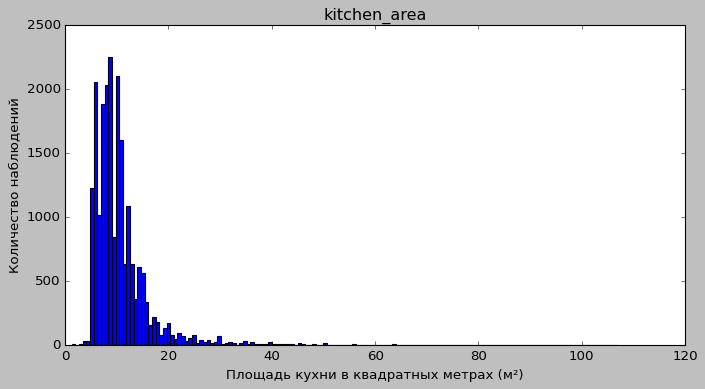

In [60]:
column_hist('kitchen_area', 'Площадь кухни в квадратных метрах (м²)')

In [61]:
column_info('living_area')

Количество пропущенных значений: 1859
Тип данных: float64
Информация о данных: count    21602.000000
mean        34.455871
std         21.930340
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64


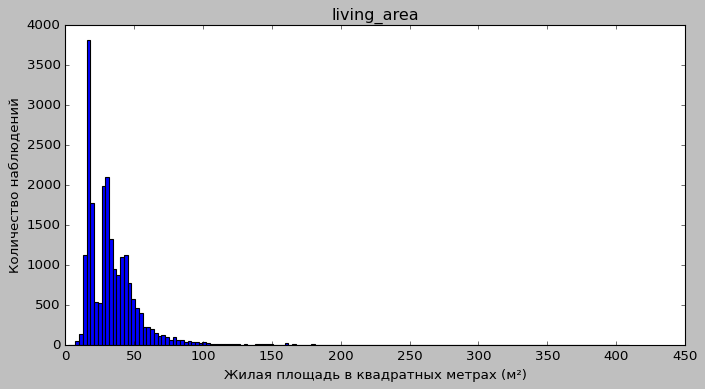

In [62]:
column_hist('living_area', 'Жилая площадь в квадратных метрах (м²)')

СНиП 31-01-2003 п 5.7: " 5.7 Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м.

Удалим из данных квартиры, которые не являются студиями или квартирами с открытой планировкой, но при этом имеют суммарную площадь жилых и кухонных помещений меньше, чем установлено в СНиП.

In [63]:
# не получается что-то 

#if (df['is_studio'] == False) and (df['is_open_plan'] == False):
#    df = df.loc[(df['living_area'] >= 14) | (df['kitchen_area'] >= 5)]

Согласно нашим правилам, общая площадь квартиры не может быть меньше 19 квадратных метров, жилая площадь - меньше 14 квадратных метров, а кухонная - меньше 5 квадратных метров.  Однако, учитывая возможность перепланировок, мы считаем необходимым удалить из датасета только те квартиры, общая площадь которых меньше 19 квадратных метров.

In [64]:
df[df['total_area'] < 19]['total_area'].count() 

24

In [65]:
df = df[df['total_area'] > 19] 

В столбцах living_area и kitchen_area присутствует значительное количество пропусков.  Примечательно, что эти пропуски не связаны с указанием типа квартиры (студия или открытая планировка).  Поэтому,  корректное заполнение пропусков без искажения данных невозможно.  В связи с этим,  мы оставляем пропуски без изменений.

**is_open_plan, is_studio**

In [66]:
column_info('is_open_plan')

Количество пропущенных значений: 0
Тип данных: bool
Информация о данных: count     23435
unique        2
top       False
freq      23370
Name: is_open_plan, dtype: object


In [67]:
column_info('is_studio')

Количество пропущенных значений: 0
Тип данных: bool
Информация о данных: count     23435
unique        2
top       False
freq      23295
Name: is_studio, dtype: object


Тут все в порядке

**parks_around_3000, parks_nearest**

**ponds_around3000, ponds_nearest**

In [68]:
column_info('parks_around_3000')

Количество пропущенных значений: 5455
Тип данных: float64
Информация о данных: count    17980.000000
mean         0.610845
std          0.801928
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64


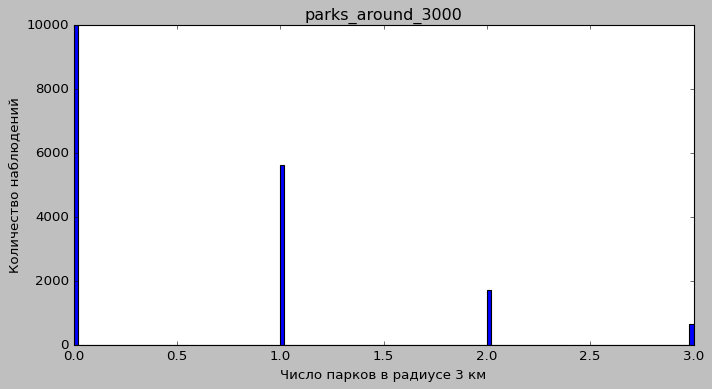

In [69]:
column_hist('parks_around_3000', 'Число парков в радиусе 3 км')

Информация о количестве парков в радиусе 3 километров  формировалась автоматически.  Пропуски в этих столбцах,  вероятнее всего,  означают, что в пределах заданной  зоны (3 км)  отсутствуют  парки. В таком случае,  логичным шагом  будет замена  пропусков  в этих столбцах на нули. И тип данных на int.

In [70]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype('int')

In [71]:
column_info('parks_around_3000')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23435.000000
mean         0.468658
std          0.748351
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64


Посмотрим на ponds_around_3000

In [72]:
column_info('ponds_around_3000')

Количество пропущенных значений: 5455
Тип данных: float64
Информация о данных: count    17980.000000
mean         0.768576
std          0.938099
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64


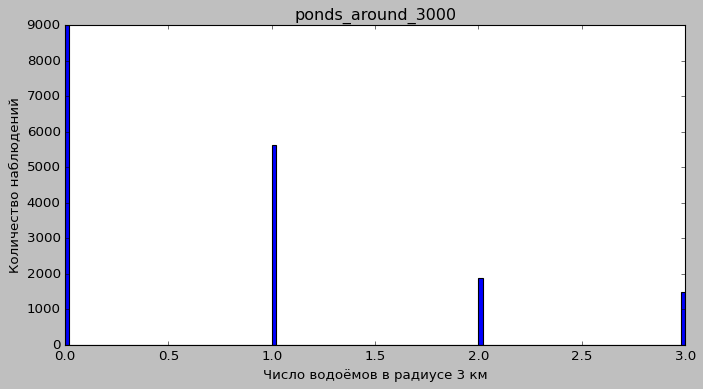

In [73]:
column_hist('ponds_around_3000', 'Число водоёмов в радиусе 3 км')

Тут все аналогично

In [74]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype('int')

In [75]:
column_info('ponds_around_3000')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23435.000000
mean         0.589674
std          0.883557
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64


Идем дальше

In [76]:
column_info('parks_nearest')

Количество пропущенных значений: 15451
Тип данных: float64
Информация о данных: count    7984.000000
mean      490.686247
std       342.261876
min         1.000000
25%       287.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


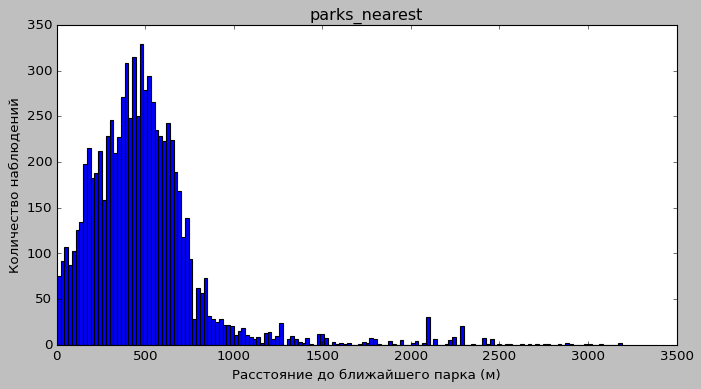

In [77]:
column_hist('parks_nearest', 'Расстояние до ближайшего парка (м)')

In [78]:
column_info('ponds_nearest')

Количество пропущенных значений: 14449
Тип данных: float64
Информация о данных: count    8986.000000
mean      518.729245
std       277.828386
min        13.000000
25%       294.000000
50%       503.000000
75%       731.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


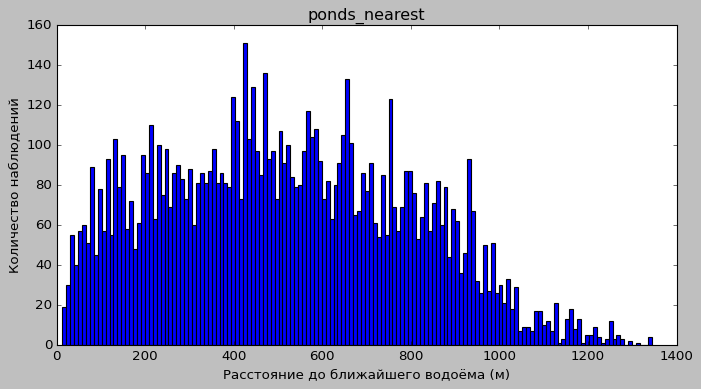

In [79]:
column_hist('ponds_nearest', 'Расстояние до ближайшего водоёма (м)')

Смотря на данные о расстоянии до ближайшего водоема или парка, сразу возникает вопрос: а не собирает ли система информацию только в определенном радиусе, в нашем случае, 3 км? Логично, что если в этом радиусе есть водоем или парк, то и расстояние до него есть. А если нет, то будет пропуск в данных. Я думаю, что пропуски лучше оставить.

Проверим,  существуют ли в данных случаи,  когда число парков равно нулю,  а расстояние до ближайшего парка больше нуля.

In [80]:
df.loc[(df['parks_around_3000'] == 0) & (df['parks_nearest'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11,2,2.65,18,37.0,13,False,False,False,10.0,0,Санкт-Петербург,3.0,9791.0,0,3064.0,1,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21,1,2.65,5,17.7,2,False,False,False,5.5,0,Санкт-Петербург,9.0,9734.0,0,3190.0,1,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12,5,3.00,2,80.0,2,False,False,False,17.0,1,Санкт-Петербург,17.0,8656.0,0,3013.0,3,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22,1,2.60,5,16.5,1,False,False,False,5.5,0,Санкт-Петербург,9.0,9734.0,0,3190.0,1,431.0,176.0


....... Поспешил я заменять на 0. Меняем эти значения на 1 т.к. в любом случае будет 1 парк.

In [81]:
df.loc[(df['parks_around_3000'] == 0) & (df['parks_nearest'] > 0), ['parks_around_3000']] = 1

In [82]:
df.loc[(df['parks_around_3000'] == 0) & (df['parks_nearest'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Аналогично для ponds_around_3000

In [83]:
df.loc[(df['ponds_around_3000'] == 0) & (df['ponds_nearest'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Тут в норме

**rooms**

In [84]:
column_info('rooms')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23435.000000
mean         2.072200
std          1.077199
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


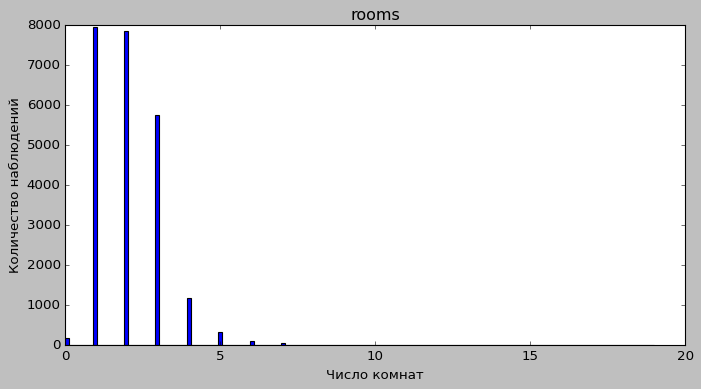

In [85]:
column_hist('rooms', 'Число комнат')

Большинство квартир, представленных на рынке, имеют одну, две или три комнаты. 

**total_images**

In [86]:
column_info('total_images')

Количество пропущенных значений: 0
Тип данных: int64
Информация о данных: count    23435.000000
mean         9.888329
std          5.679556
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


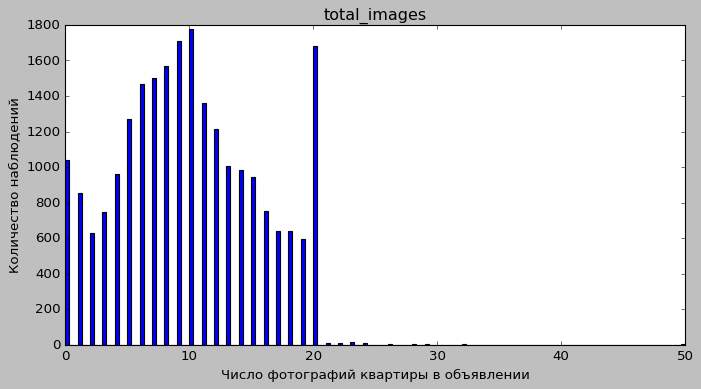

In [87]:
column_hist('total_images', 'Число фотографий квартиры в объявлении')

Обращает на себя внимание необычное количество объявлений (более 1000) с нулевым количеством фотографий. Также наблюдается  резкий пик на 20 фотографиях, после которого количество объявлений с большим количеством фотографий  резко снижается.  Вероятно, платформа имеет ограничение на максимальное количество фотографий (20).

	Запрещено размещать объявления об объектах недвижимости без фотографий. Минимальное количество фотографий зависит от типа объекта и вида размещения.
Жилой объект:
при размещении вручную — 4 шт;
при размещении в фиде — 3 шт.
Нежилой объект:
при любом типе размещения — 2 шт.
Снимок планировки в это число не выходит. Он всегда считается отдельно.

Эту информацию я нашел на "Яндекс Справка". Получается, надо удалить наблюдения, где число фотографий меньше 4. Возможно, в тот момент времени, когда собирались эти данные, требования о количестве фотографий не существовало. В этом случае не стоит  удалять объявления с малым  количеством фотографий. Единственное, что стоит сделать, - изменить тип данных на int.

Пик  на  20  фотографиях  и  резкий  спад  после  этого  значения  остаются  необъяснимыми.

In [88]:
df['total_images'] = df['total_images'].astype('int')

**last_price**

In [89]:
column_info('last_price')

Количество пропущенных значений: 0
Тип данных: float64
Информация о данных: count    2.343500e+04
mean     6.538185e+06
std      1.059907e+07
min      1.219000e+04
25%      3.442000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


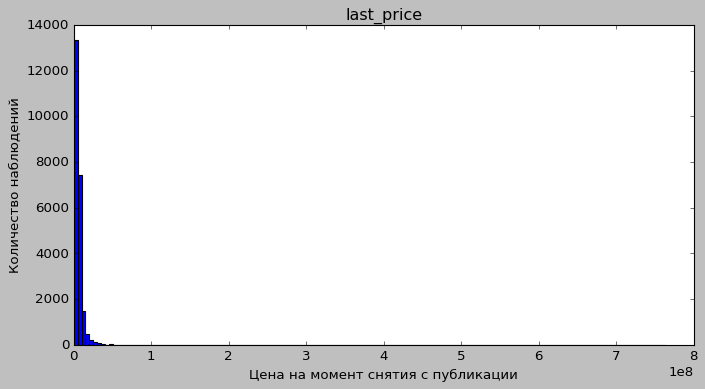

In [90]:
column_hist('last_price', 'Цена на момент снятия с публикации')

Средняя цена объектов недвижимости составляет около 6,5 млн. рублей.  Максимальная цена достигает 763 млн. рублей, а минимальная - 12 тысяч рублей.  Чтобы лучше понять  динамику цен,  давайте  подробнее  рассмотрим  крайние  значения.

In [91]:
df[df['last_price'] < 500000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,2.65,1,23.0,1,False,False,False,5.8,0,Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
6859,6,490000.0,40.0,2017-12-11,1,2.65,5,NaN,3,False,False,False,NaN,0,Старополье,NaN,NaN,0,NaN,0,NaN,43.0
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,7.0,9176.0,1,805.0,0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31,2,2.65,5,30.3,3,False,False,False,5.5,0,Старополье,NaN,NaN,0,NaN,0,NaN,96.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,False,False,5.5,0,Сланцы,NaN,NaN,0,NaN,0,NaN,719.0
14911,5,430000.0,54.0,2018-06-26,2,2.65,3,NaN,3,False,False,False,NaN,0,Свирь,NaN,NaN,0,NaN,0,NaN,44.0
16032,8,480000.0,32.0,2019-01-06,1,2.65,2,16.0,1,False,False,False,NaN,0,Сланцы,NaN,NaN,0,NaN,0,NaN,83.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,NaN,1,False,False,False,NaN,0,Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.0
16274,18,440000.0,40.0,2018-07-10,1,2.65,5,NaN,1,False,False,False,NaN,0,Старополье,NaN,NaN,0,NaN,0,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN


В целом данные выглядят корректно. Однако, цена двухкомнатной квартиры в Санкт-Петербурге в 12190 рублей выглядит  подозрительно низкой. Вероятнее всего, пользователь ошибся и указал цену в тысячах рублей. Давайте увеличим ее на 1000, чтобы  получить более реалистичное значение.

In [92]:
df['last_price'] = df['last_price'].replace(12190, 12190000)

Теперь посмотрим дорогие квартиры.

In [93]:
df[df['last_price'] > 500000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,False,False,NaN,2,Санкт-Петербург,19.0,3956.0,1,530.0,3,756.0,33.0


Цена выглядит не реалистичной. Думаю лучше удалить данное наблюдение.

In [94]:
df = df.loc[df['last_price'] < 500000000]

**Вывод:** Датафрейм содержит информацию о продаже недвижимости с ноября 2014 года по май 2019 года. Мы проанализировали каждый столбец, проведя предварительную очистку данных. В ходе анализа мы обработали дубликаты в столбце "locality_name", выявили и убрали аномальные значения, частично заполнили пропущенные данные и привели типы данных в столбцах к нужному формату.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23434 non-null  int64         
 1   last_price            23434 non-null  float64       
 2   total_area            23434 non-null  float64       
 3   first_day_exposition  23434 non-null  datetime64[ns]
 4   rooms                 23434 non-null  int64         
 5   ceiling_height        23434 non-null  float64       
 6   floors_total          23434 non-null  int64         
 7   living_area           21584 non-null  float64       
 8   floor                 23434 non-null  int64         
 9   is_apartment          23434 non-null  bool          
 10  is_studio             23434 non-null  bool          
 11  is_open_plan          23434 non-null  bool          
 12  kitchen_area          21247 non-null  float64       
 13  balcony         

## Добавьление в таблицу новых столбцов

**Цена одного квадратного метра**

In [96]:
df['price_to_m'] = round(df['last_price'] / df['total_area'], 2)

In [97]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,20.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,7.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,10.0,13933.0,1,90.0,2,574.0,558.0,92785.71


**День недели, месяц и год публикации объявления**

In [98]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year


In [99]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,20.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,7.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,10.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015


**Тип этажа квартиры**

In [100]:
df['floor_type'] = ['Другой']*len(df)
df.loc[df['floor'] == 1, 'floor_type'] = 'Первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'Последний'


In [101]:
df.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floor_type
7439,7,4500000.0,46.0,2018-12-17,2,2.65,5,30.8,2,False,False,False,6.4,0,Санкт-Петербург,7.0,10862.0,2,201.0,0,NaN,60.0,97826.09,0,12,2018,Другой
2008,6,3995000.0,66.2,2017-09-27,3,2.65,7,38.5,2,False,False,False,7.8,0,Гатчина,NaN,NaN,0,NaN,0,NaN,64.0,60347.43,2,9,2017,Другой
533,15,5900000.0,67.4,2019-01-11,3,2.50,9,48.5,8,False,False,False,6.2,0,Санкт-Петербург,15.0,20410.0,0,NaN,0,NaN,95.0,87537.09,4,1,2019,Другой


In [102]:
column_info('floor_type')

Количество пропущенных значений: 0
Тип данных: object
Информация о данных: count      23434
unique         3
top       Другой
freq       17246
Name: floor_type, dtype: object


<AxesSubplot:>

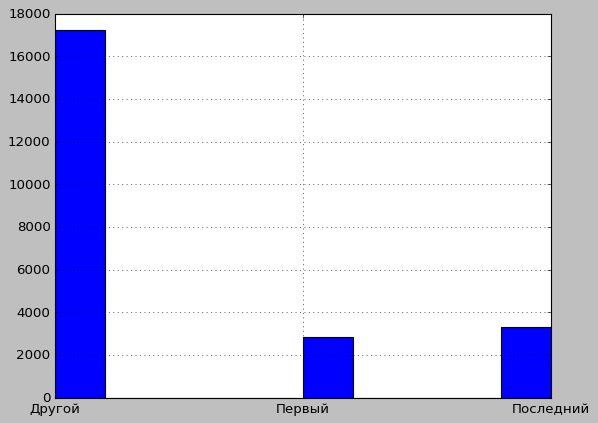

In [103]:
df['floor_type'].hist()

Данные вполне объективны 

**Расстояние до центра города в километрах**

In [104]:
df['city_centers_nearest_in_km'] = round(df['city_centers_nearest'] / 1000, 0)

In [105]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,20.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,7.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,10.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,Другой,14.0


**Вывод:** Мы создали 6 новых колонок, необходимых для дальнейшего исследовательского анализа данных.

## Исследовательский анализ данных

### Как быстро продавались квартиры (столбец days_exposition)

In [106]:
column_info('days_exposition')

Количество пропущенных значений: 3154
Тип данных: float64
Информация о данных: count    20280.000000
mean       181.025789
std        220.038558
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


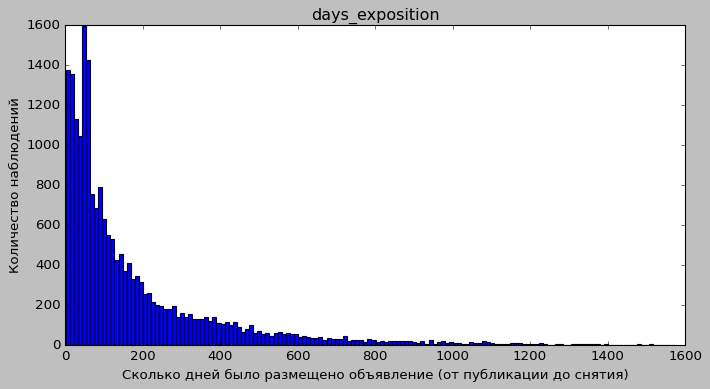

In [107]:
column_hist('days_exposition', 'Cколько дней было размещено объявление (от публикации до снятия)')

Вижу два пика в начале. Рассмотрим поближе

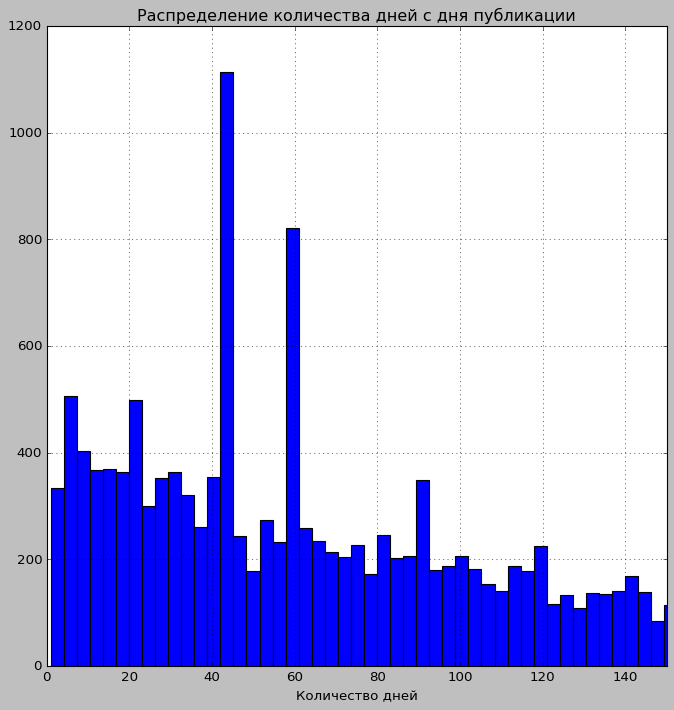

In [108]:
plt.figure(figsize=(10,10))    
df.days_exposition.hist(bins=500)
plt.xlabel('Количество дней')
plt.title('Распределение количества дней с дня публикации')
plt.xlim(0,150)
plt.show()

45й и 60й день...... Посмотрим на Яндекс Справке

Сроки публикации
Действуют по всей России кроме Москвы, Санкт-Петербурга и их областей.

Вид объекта. Тип сделки 

Квартира	
* до 4,5 млн — 45 дней
* от 4,5 до 10 млн — 60 дней
* от 10 млн — 90 дней


**Вывод:** Вероятно, эти объявления относятся к недвижимости, расположенной не в Санкт-Петербурге, а в других населенных пунктах.  Скорее всего, срок публикации этих объявлений просто истек.  Объявления, которые висят более 90 дней, вероятно,  просто продлеваются.

Для дальнейшего анализа предлагаю разделить квартиры по цене (last_price) на три категории:

* flat (обычная квартира)
* elite (элитное жилье)
* apartment (апартаменты)

Категория будет определяться следующим образом:
* Если значение в столбце is_apartment равно True, то категория будет apartment.
* В остальных случаях категория будет определяться на основе стоимости жилья, создавая границы между категориями "flat" и "elite".

In [109]:
def realty_type(row):
    apartment = row['is_apartment']
    price = row['last_price']
    
    if apartment == False:
        if price < 4500000:
            return "flat"
        elif 4500000 <= price <= 10000000:
            return "elite"
        else:
            return "apartment"
    else:
        return "apartment"

In [110]:
df['realty_type'] = df.apply(realty_type, axis=1)

Проведем проверку

In [111]:
df[(df['realty_type'] != "apartment") & (df['is_apartment'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_in_km,realty_type


Все хорошо

Проанализируем, как изменяется среднее и медианное количество дней с момента публикации объявления в зависимости от года. Для каждой категории жилья.

In [112]:
days_median = df.pivot_table(
    index='year_exposition', 
    columns='realty_type', 
    values='days_exposition', 
    aggfunc='median')

In [113]:
days_median

realty_type,apartment,elite,flat
year_exposition,,,
2014,1001.0,822.5,940.0
2015,702.0,583.0,516.5
2016,318.5,241.0,221.0
2017,149.0,109.0,90.0
2018,94.0,67.0,55.0
2019,30.0,24.0,22.0


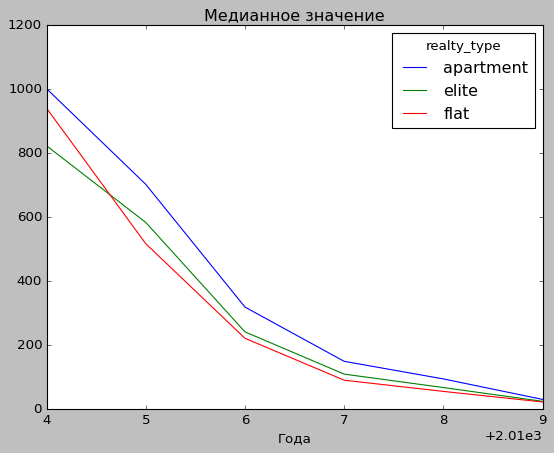

In [114]:
days_median.plot()
plt.xlabel('Года')
plt.title('Медианное значение')
plt.show() 

In [115]:
days_mean = df.pivot_table(
    index='year_exposition', 
    columns='realty_type', 
    values='days_exposition', 
    aggfunc='mean')

In [116]:
days_mean

realty_type,apartment,elite,flat
year_exposition,,,
2014,963.209302,837.952381,937.151515
2015,764.581522,654.937374,599.347826
2016,378.861290,326.804785,307.940594
2017,212.090909,163.201409,144.748913
2018,127.457050,96.303862,87.243026
2019,37.116883,31.110487,29.885776


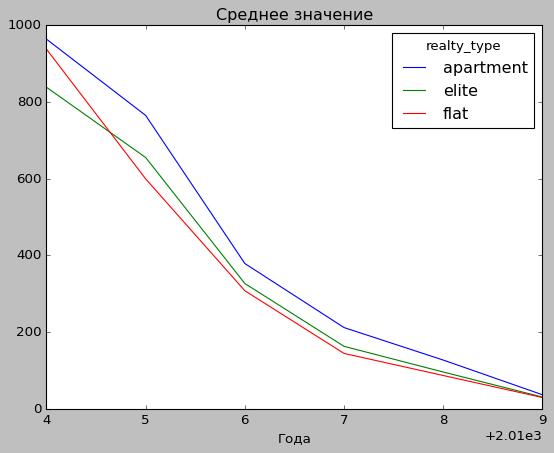

In [117]:
days_mean.plot()
plt.xlabel('Года')
plt.title('Среднее значение')
plt.show() 

Анализ показывает, что для всех типов жилья наблюдается тенденция к сокращению сроков продажи.  Новые объявления, как правило, продаются быстрее.  

Наиболее длительные сроки продажи наблюдаются у объектов, объявления о которых были размещены в 2014 году.  В 2019 году, наоборот, недвижимость находит покупателя в среднем за месяц:  чуть более месяца - для неэлитного жилья,  и менее месяца - для элитного.

Построим диаграммы размаха для каждой категории, чтобы определить, какие продажи можно считать быстрыми, а какие - необычно долгими.

<AxesSubplot:>

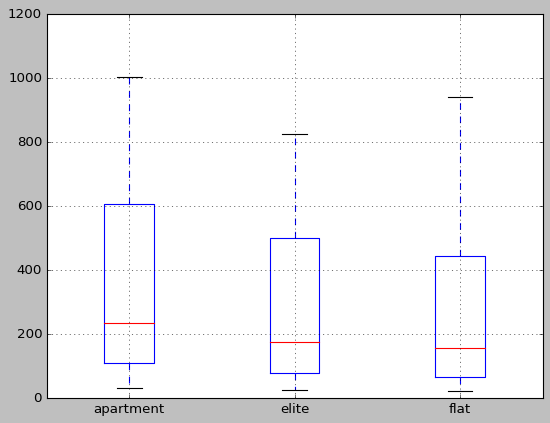

In [118]:
days_median.boxplot()

<AxesSubplot:>

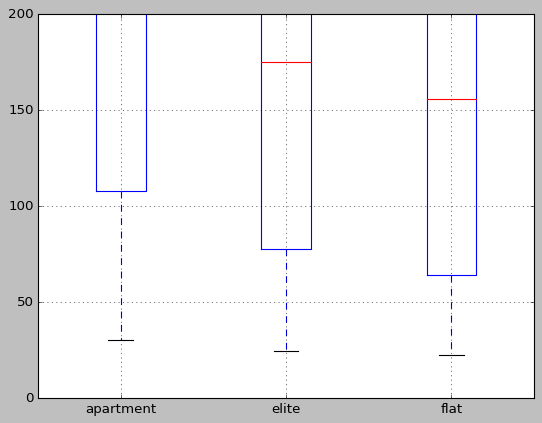

In [119]:
plt.ylim(0, 200)
days_median.boxplot()

<AxesSubplot:>

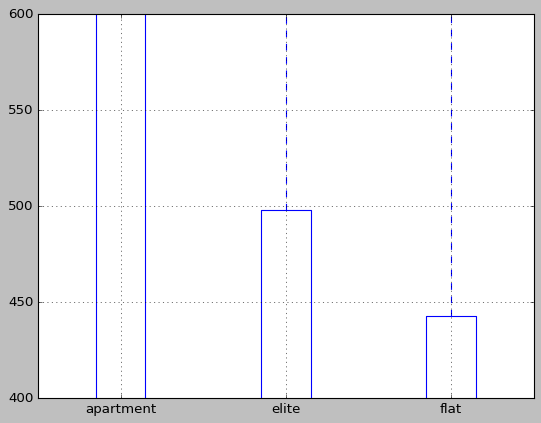

In [120]:
plt.ylim(400,600)
days_median.boxplot()

**Вывод:** Считается, что продажа квартиры (flat)  быстрая, если она занимает не более 65 дней,  элитного жилья (elite) - не более 80 дней,  а апартаментов (apartment) - не более 105 дней.  

Продажу можно считать  долгой,  если  она  занимает  более  440  дней  для  квартиры  (flat),  более  500  дней  для  элитного  жилья  (elite)  и  более  600  дней  для  апартаментов  (apartment).

### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [121]:
pd.DataFrame(df.corr()['last_price']).sort_values(by='last_price', ascending=False).style.background_gradient('coolwarm')

,last_price
last_price,1.000000
price_to_m,0.746346
total_area,0.695269
living_area,0.604783
kitchen_area,0.511847
rooms,0.391632
ceiling_height,0.330587
ponds_around_3000,0.232047
parks_around_3000,0.230658
airports_nearest,0.125213


**Вывод:** Наиболее сильная корреляция наблюдается между last_price и следующими переменными:

* общая площадь
* жилая площадь
* площадь кухни
* количество комнат
* высота потолков
* наличие парка или водоема вблизи квартиры

Также наблюдается зависимость между ценой и расстоянием до центра города: чем ближе к центру, тем выше цена.

**Зависимость от общей площади**

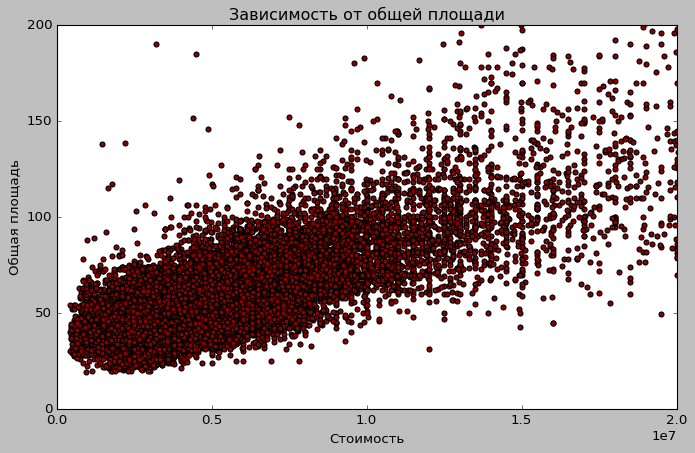

In [122]:
df.plot(kind='scatter', x='last_price', y='total_area', figsize=(10, 6), color='darkred')
plt.ylim(0, 200)
plt.xlim(0, 20000000)
plt.title('Зависимость от общей площади')
plt.xlabel('Стоимость')
plt.ylabel('Общая площадь')
plt.show()

**Зависимость от площади кухни**

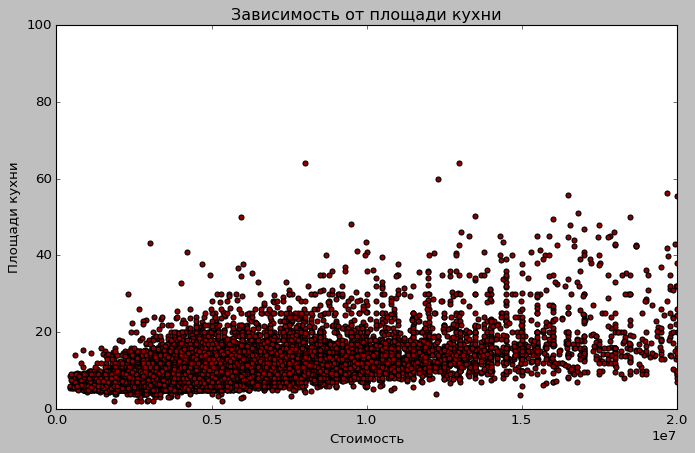

In [123]:
df.plot(kind='scatter', x='last_price', y='kitchen_area', figsize=(10, 6), color='darkred')
plt.ylim(0, 100)
plt.xlim(0, 20000000)
plt.title('Зависимость от площади кухни')
plt.xlabel('Стоимость')
plt.ylabel('Площади кухни')
plt.show()

**Зависимость от жилой площади**

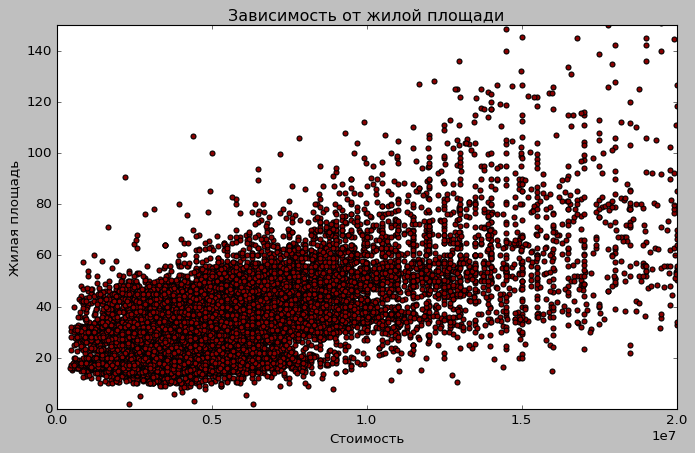

In [124]:
df.plot(kind='scatter', x='last_price', y='living_area', figsize=(10, 6), color='darkred')
plt.ylim(0, 150)
plt.xlim(0, 20000000)
plt.title('Зависимость от жилой площади')
plt.xlabel('Стоимость')
plt.ylabel('Жилая площадь')
plt.show()

**Зависимость от количества комнат**

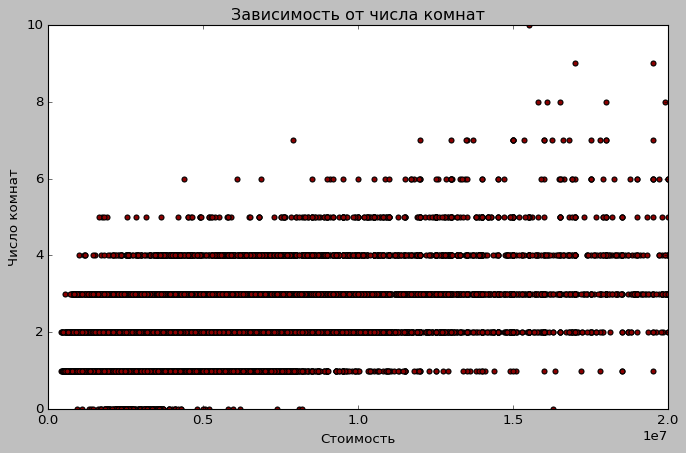

In [125]:
df.plot(kind='scatter', x='last_price', y='rooms', figsize=(10, 6), color='darkred')
plt.ylim(0, 10)
plt.xlim(0, 20000000)
plt.title('Зависимость от числа комнат')
plt.xlabel('Стоимость')
plt.ylabel('Число комнат')
plt.show()

Все рассмотренные факторы демонстрируют положительную корреляцию с ценой квартиры.

**Зависимость от этажа, на котором расположена квартира (первый, последний, другой)**

In [126]:
df.pivot_table(index='floor_type',values='last_price', aggfunc='median').reset_index()

,floor_type,last_price
0,Другой,4850000.0
1,Первый,3900000.0
2,Последний,4300000.0


Цена квартиры напрямую зависит от этажа. Квартиры на первом этаже, как правило, самые дешевые. Хотя жизнь на более высоких этажах комфортнее и открывает более приятный вид, последний этаж тоже не всегда является оптимальным выбором для покупателя. Если в доме нет лифта, подъем на высокие этажи может быть неудобным (особенно если сегодня был день ног). Да и летом на последнем этаже жарче всего.

**Зависимость от даты размещения (день недели, месяц, год)**

In [127]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_in_km,realty_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,20.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,Другой,16.0,apartment
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,7.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,Первый,19.0,flat
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,10.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,Другой,14.0,elite
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,0.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,Другой,7.0,apartment
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,2.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,Другой,8.0,elite


In [128]:
data_weekday_exposition = df.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
data_weekday_exposition

,last_price
weekday_exposition,
0,4650000.0
1,4750000.0
2,4700000.0
3,4650000.0
4,4580000.0
5,4550000.0
6,4550000.0


Text(0.5, 1.0, 'Зависимость цены от дня недели')

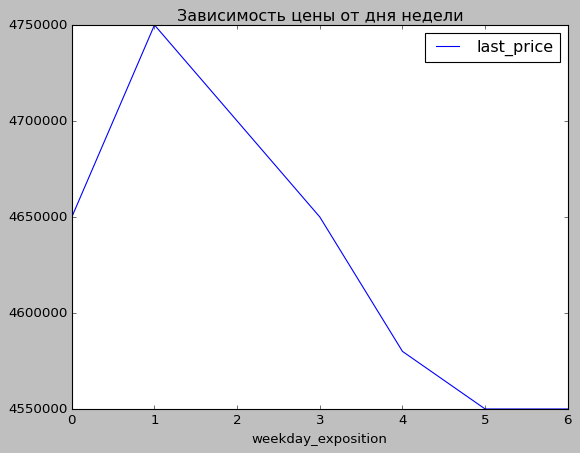

In [129]:
data_weekday_exposition.plot()
plt.title('Зависимость цены от дня недели')

Наиболее дорогие квартиры выставляются на продажу в начале недели, после чего наблюдается снижение цены. Пиковое значение стоимости приходится на вторник.

In [130]:
data_month_exposition = df.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
data_month_exposition

,last_price
month_exposition,
1,4600000.0
2,4650000.0
3,4667500.0
4,4800000.0
5,4500000.0
6,4400000.0
7,4650000.0
8,4600000.0
9,4700000.0


Text(0.5, 1.0, 'Зависимость цены от месяца')

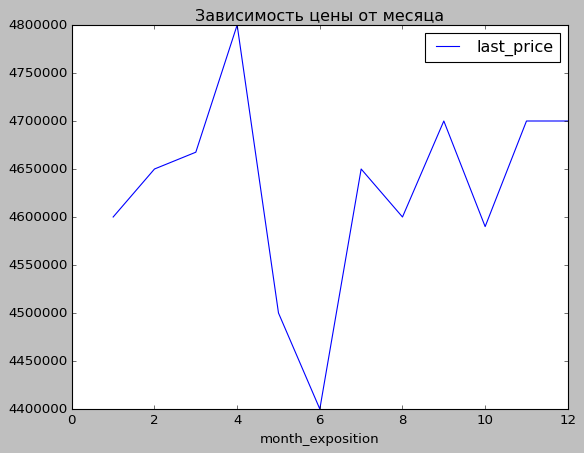

In [131]:
data_month_exposition.plot()
plt.title('Зависимость цены от месяца')

На цену также влияет сезонность. Весна - самый дорогой сезон для покупки квартиры, а лето - самый дешевый.

In [132]:
data_year_exposition = df.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
data_year_exposition

,last_price
year_exposition,
2014,7640000.0
2015,5324000.0
2016,4550000.0
2017,4500000.0
2018,4590000.0
2019,5065000.0


Text(0.5, 1.0, 'Зависимость цены от года')

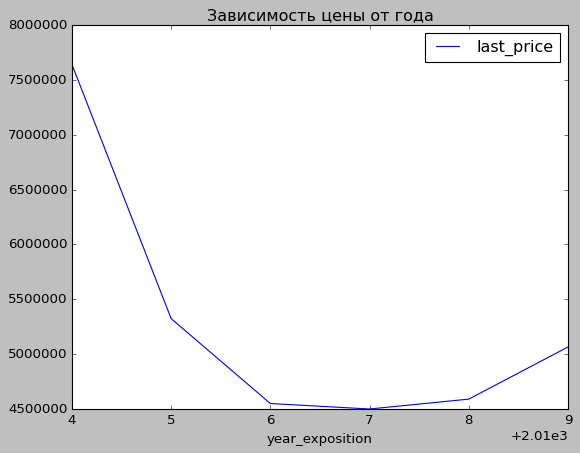

In [133]:
data_year_exposition.plot()
plt.title('Зависимость цены от года')

"валютный кризис в России, начавшийся в конце 2014 года из-за резкого снижения на мировом рынке стоимости нефти, в результате которого курс российского рубля упал по отношению к иностранным валютам в 2 раза, в очередной раз самым негативным образом повлиял на стоимость недвижимости"

Пик стоимости квартир наблюдался в 2014 году, после чего последовало резкое снижение цен, которое продолжалось до 2016 года. Лишь с 2017 года цена начала расти снова. Это вполне логичное поведение цен в условиях кризиса.

**Вывод:** Анализ показал, что на стоимость квартир наибольшее влияние оказывают общая площадь, количество комнат, этаж и экономическая ситуация (кризис).

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Создадим таблицу с медианной ценой одного квадратного метра для 10 населенных пунктов с наибольшим количеством объявлений о продаже недвижимости.

In [ ]:
loc_df = df[df['locality_name'].isin(df['locality_name'].value_counts().index[:10])]
loc_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_in_km,realty_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,20.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,Другой,16.0,apartment
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.00,2,Шушары,7.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,Первый,19.0,flat
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,10.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,Другой,14.0,elite
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,0.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,Другой,7.0,apartment
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,2.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,Другой,8.0,elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,13.0,16081.0,1,353.0,2,652.0,29.0,100566.57,2,2,2018,Другой,16.0,flat
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,3.0,6263.0,1,300.0,0,NaN,15.0,105769.23,3,7,2018,Другой,6.0,elite
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,11.0,4489.0,0,NaN,1,806.0,519.0,129903.98,3,10,2016,Другой,4.0,elite
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,9.0,4232.0,1,796.0,3,381.0,NaN,72490.85,1,3,2017,Другой,4.0,elite


In [135]:
locality_name_in_m = loc_df.pivot_table(index='locality_name', values=['price_to_m', 'last_price'], aggfunc='median')
locality_name_in_m.sort_values(by='price_to_m', ascending=False)

,last_price,price_to_m
locality_name,,
Санкт-Петербург,5500000.0,104761.900
Пушкин,5194638.0,99987.180
Кудрово,3890000.0,95588.240
Парголово,4115000.0,91780.225
Мурино,3400000.0,86250.375
Шушары,3950000.0,76747.970
Колпино,3600000.0,74725.270
Гатчина,3095000.0,67860.570
Всеволожск,3450000.0,65789.470


Неудивительно, что самая высокая стоимость за квадратный метр наблюдается именно в Санкт-Петербурге. 

Визуализируем разницу в цене за квадратный метр в разных населенных пунктах с помощью графика.

Text(0.5, 1.0, 'Медианная цена одного квадратного метра в 10 населённых пунктах')

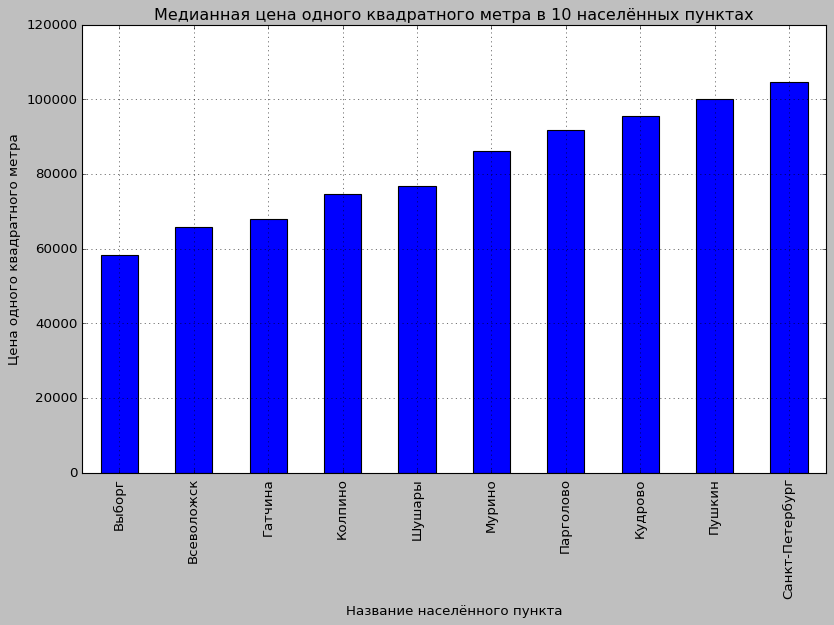

In [136]:
locality_name_in_m['price_to_m'].sort_values().plot(kind='bar', figsize=(12, 7), color='blue', grid=True)

plt.xlabel('Название населённого пункта')
plt.ylabel('Цена одного квадратного метра')
plt.title('Медианная цена одного квадратного метра в 10 населённых пунктах')

**Вывод:** В сравнении с другими городами, самые доступные цены на недвижимость за квадратный метр предлагают Выборг и Всеволожск. Самая высокая цена, как и ожидалось, в Санкт-Петербурге, где она достигает 104761 рубля. Пушкин по стоимости жилья находится на втором месте.

**Средняя стоимость на разном удалении от центра в Санкт-Петербурге**

Отфильтруем исходный датафрейм, оставив только данные по Санкт-Петербургу, и создадим новый датафрейм с этими данными.

In [137]:
sb_df = df[df['locality_name'] == 'Санкт-Петербург']

In [138]:
sb_df['city_centers_nearest_in_km'] = sb_df['city_centers_nearest_in_km'].astype('int') #изменим тип данных на int

/tmp/ipykernel_331/90774648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['city_centers_nearest_in_km'] = sb_df['city_centers_nearest_in_km'].astype('int') #изменим тип данных на int


In [139]:
sb_df['city_centers_nearest_in_km'].unique()

array([16, 14,  7,  8, 12, 15, 11, 13, 10,  2,  4, 17,  5,  9,  3,  6, 21,
       18,  1, 24, 26, 22, 23, 25,  0, 20, 27, 28, 19, 29])

In [140]:
last_price_in_km = sb_df.pivot_table(index='city_centers_nearest_in_km', values='last_price', aggfunc='median')
last_price_in_km

,last_price
city_centers_nearest_in_km,
0,17900000.0
1,11490000.0
2,10150000.0
3,8418000.0
4,9200000.0
5,9500000.0
6,8900000.0
7,7800000.0
8,7420000.0


Визуализируем данные для каждого километра с помощью графика.

Text(0.5, 1.0, 'Медианная цена одного квадратного метра в зависимости удаления от центра')

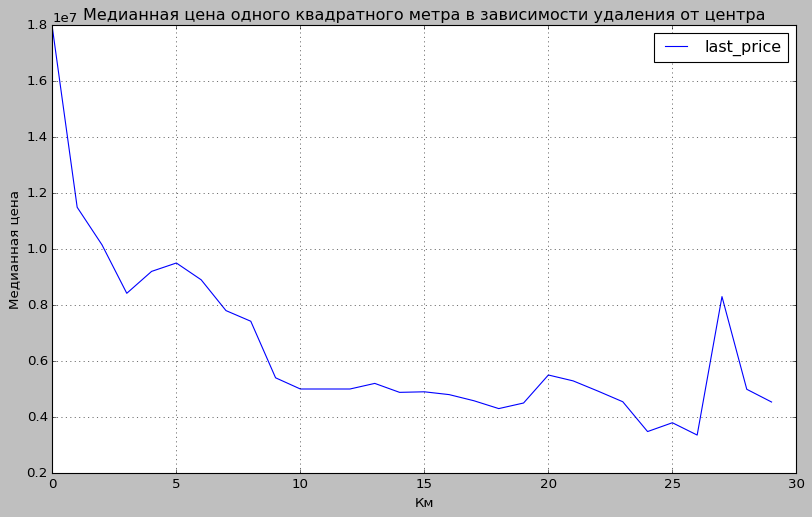

In [141]:
last_price_in_km.plot(figsize=(12, 7), grid=True)

plt.xlabel('Км')
plt.ylabel('Медианная цена')
plt.title('Медианная цена одного квадратного метра в зависимости удаления от центра')

Присмотримся к участку в районе 27 километров, где зафиксирован резкий рост цен

In [142]:
sb_df.query('city_centers_nearest_in_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_in_km,realty_type
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,13.0,27313.0,1,1496.0,0,NaN,128.0,193918.92,1,11,2017,Другой,27,apartment
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,6.0,27431.0,0,NaN,0,NaN,178.0,70312.50,1,2,2018,Последний,27,flat


**Вывод:** График демонстрирует тенденцию к снижению цен на квартиры по мере удаления от центра. Однако на 27 километре наблюдается  резкий скачок цены с 3355000 до 8300000, что заметно выделяется на фоне общего тренда. Появление объявления о продаже апартаментов на этом километре объясняет резкий скачок цен.

## Общий вывод

Проведенный анализ данных о рынке недвижимости показал, что данные требуют дополнительной обработки для обеспечения корректной интерпретации. После  очистки и подготовки данных, мы выявили ряд ключевых факторов, влияющих на стоимость недвижимости:

* Тип жилья:  квартиры, элитное жилье и апартаменты имеют разные средние сроки продажи.
* Этаж:  цена квартиры  зависит от этажа.  Первый этаж обычно самый дешевый, а последний этаж может быть менее привлекательным из-за отсутствия лифта и возможных неудобств.
* Площадь и количество комнат:   чем больше площадь и количество комнат, тем выше стоимость.
* Экономическая ситуация:  кризисные периоды влияют на стоимость недвижимости.
* Географическое положение:  стоимость недвижимости  зависит от удаленности от центра города.  В нашем анализе наблюдался скачок цены на 27 километре от центра Санкт-Петербурга, что, вероятно, связано с наличием  апартаментов на продажу в этом районе.

В целом, исследование подтверждает  влияние  различных факторов на стоимость недвижимости,  что важно  для принятия обоснованных решений при покупке или продаже жилья.

Дополнительные замечания:

*  Необходимо  продолжить  исследование, включив в анализ  дополнительные факторы,  например,  инфраструктуру района, транспортную доступность,  и др.